In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import dictionary

In [2]:
data=pd.read_csv('HeartDisease.csv')

In [3]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
import graphviz
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import IPython
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [5]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

To find no of null values in dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


To find the type of dataset whether its float or int 

In [7]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
anl_corr=data.corr()

In [10]:
anl_corr

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


CORRELATION ANALYSIS FOR THE GIVEN DATASET

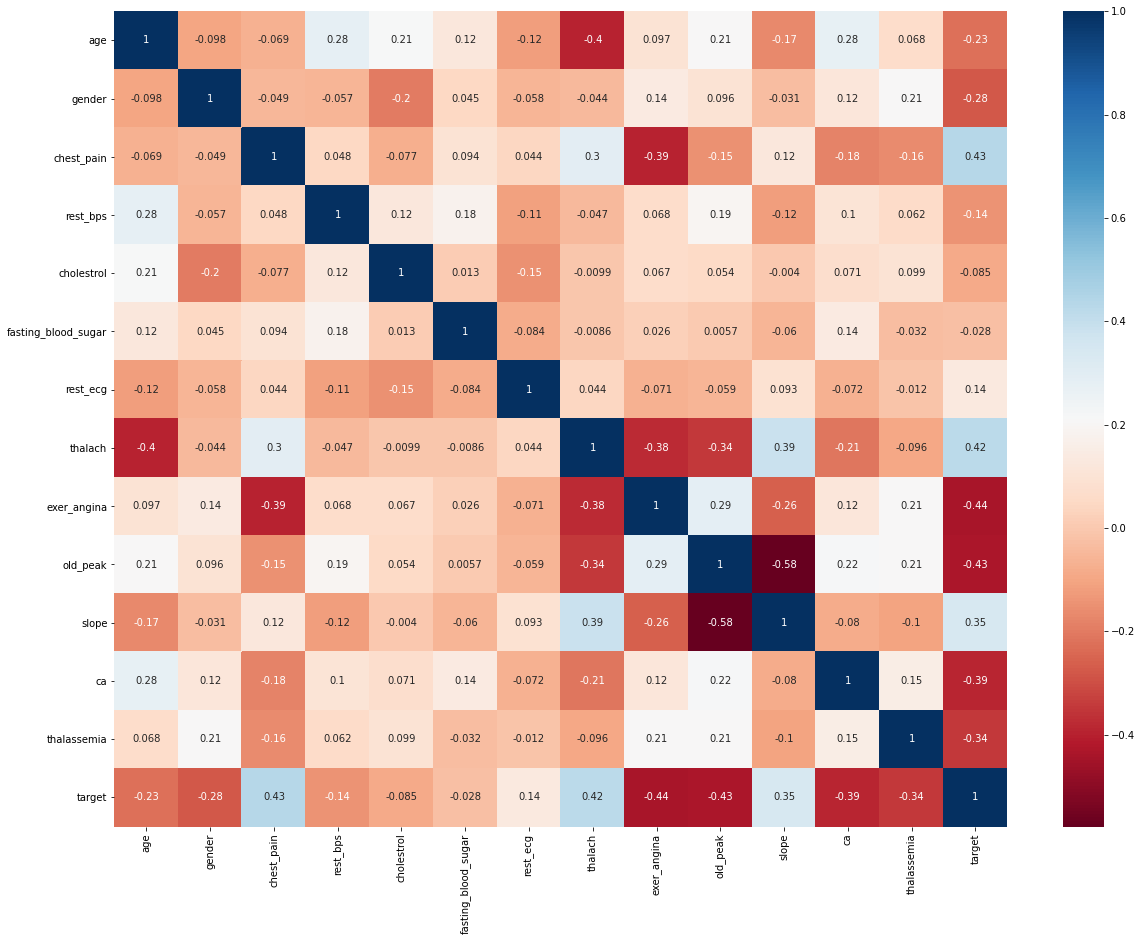

In [11]:
plt.subplots(figsize=(20,15))
sb.heatmap(anl_corr,annot=True,cmap='RdBu')

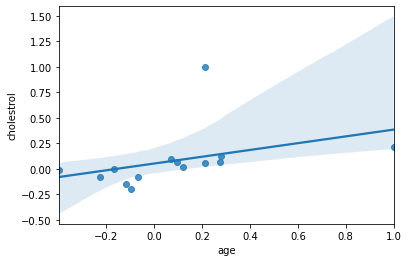

In [12]:
sb.regplot(x='age',y='cholestrol',data=anl_corr)

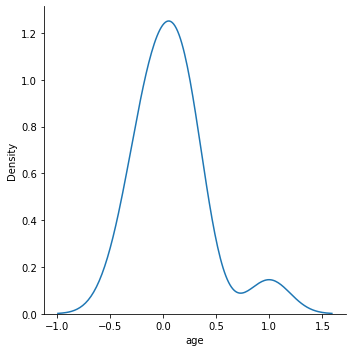

In [13]:
sb.displot(anl_corr,x='age',kind='kde')

In [14]:
x_ind=data.drop('target',axis=1)

In [15]:
x_ind

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


ASSIGNING INDEPENDENT VARAIABLES

In [16]:
y_dep=data.target

In [17]:
y_dep

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

ASSIGNING DEPENDENT VARIABLE

In [18]:
from sklearn.model_selection import train_test_split

TRAIN_TEST_SPILT FOR MODEL BULDING

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

In [20]:
from sklearn import tree

TO USE DECESION TREE IMPORT TREE

In [21]:
dt=tree.DecisionTreeClassifier()

In [22]:
dt_fit=dt.fit(x_train,y_train)

In [23]:
dt.score(x_test,y_test)

0.8360655737704918

In [24]:
y_pred=dt.predict(x_test)

In [25]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

[Text(167.4, 190.26, 'X[2] <= 0.5\ngini = 0.492\nsamples = 242\nvalue = [106, 136]'),
 Text(83.7, 135.9, 'X[11] <= 0.5\ngini = 0.426\nsamples = 114\nvalue = [79, 35]'),
 Text(41.85, 81.53999999999999, 'X[12] <= 2.5\ngini = 0.488\nsamples = 52\nvalue = [22, 30]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 0.45\ngini = 0.148\nsamples = 62\nvalue = [57, 5]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[10] <= 1.5\ngini = 0.333\nsamples = 128\nvalue = [27, 101]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.473\nsamples = 52\nvalue = [20, 32]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[3] <= 182.0\ngini = 0.167\nsamples = 76\nvalue = [7, 69]'),
 

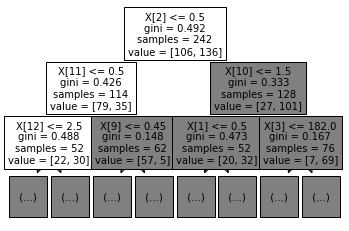

In [26]:
tree.plot_tree(dt,max_depth=2,fontsize=10)

In [27]:
data =StringIO()
export_graphviz(dt_fit,out_file=data,filled=True)

In [28]:
graph=pydotplus.graph_from_dot_data(data.getvalue())

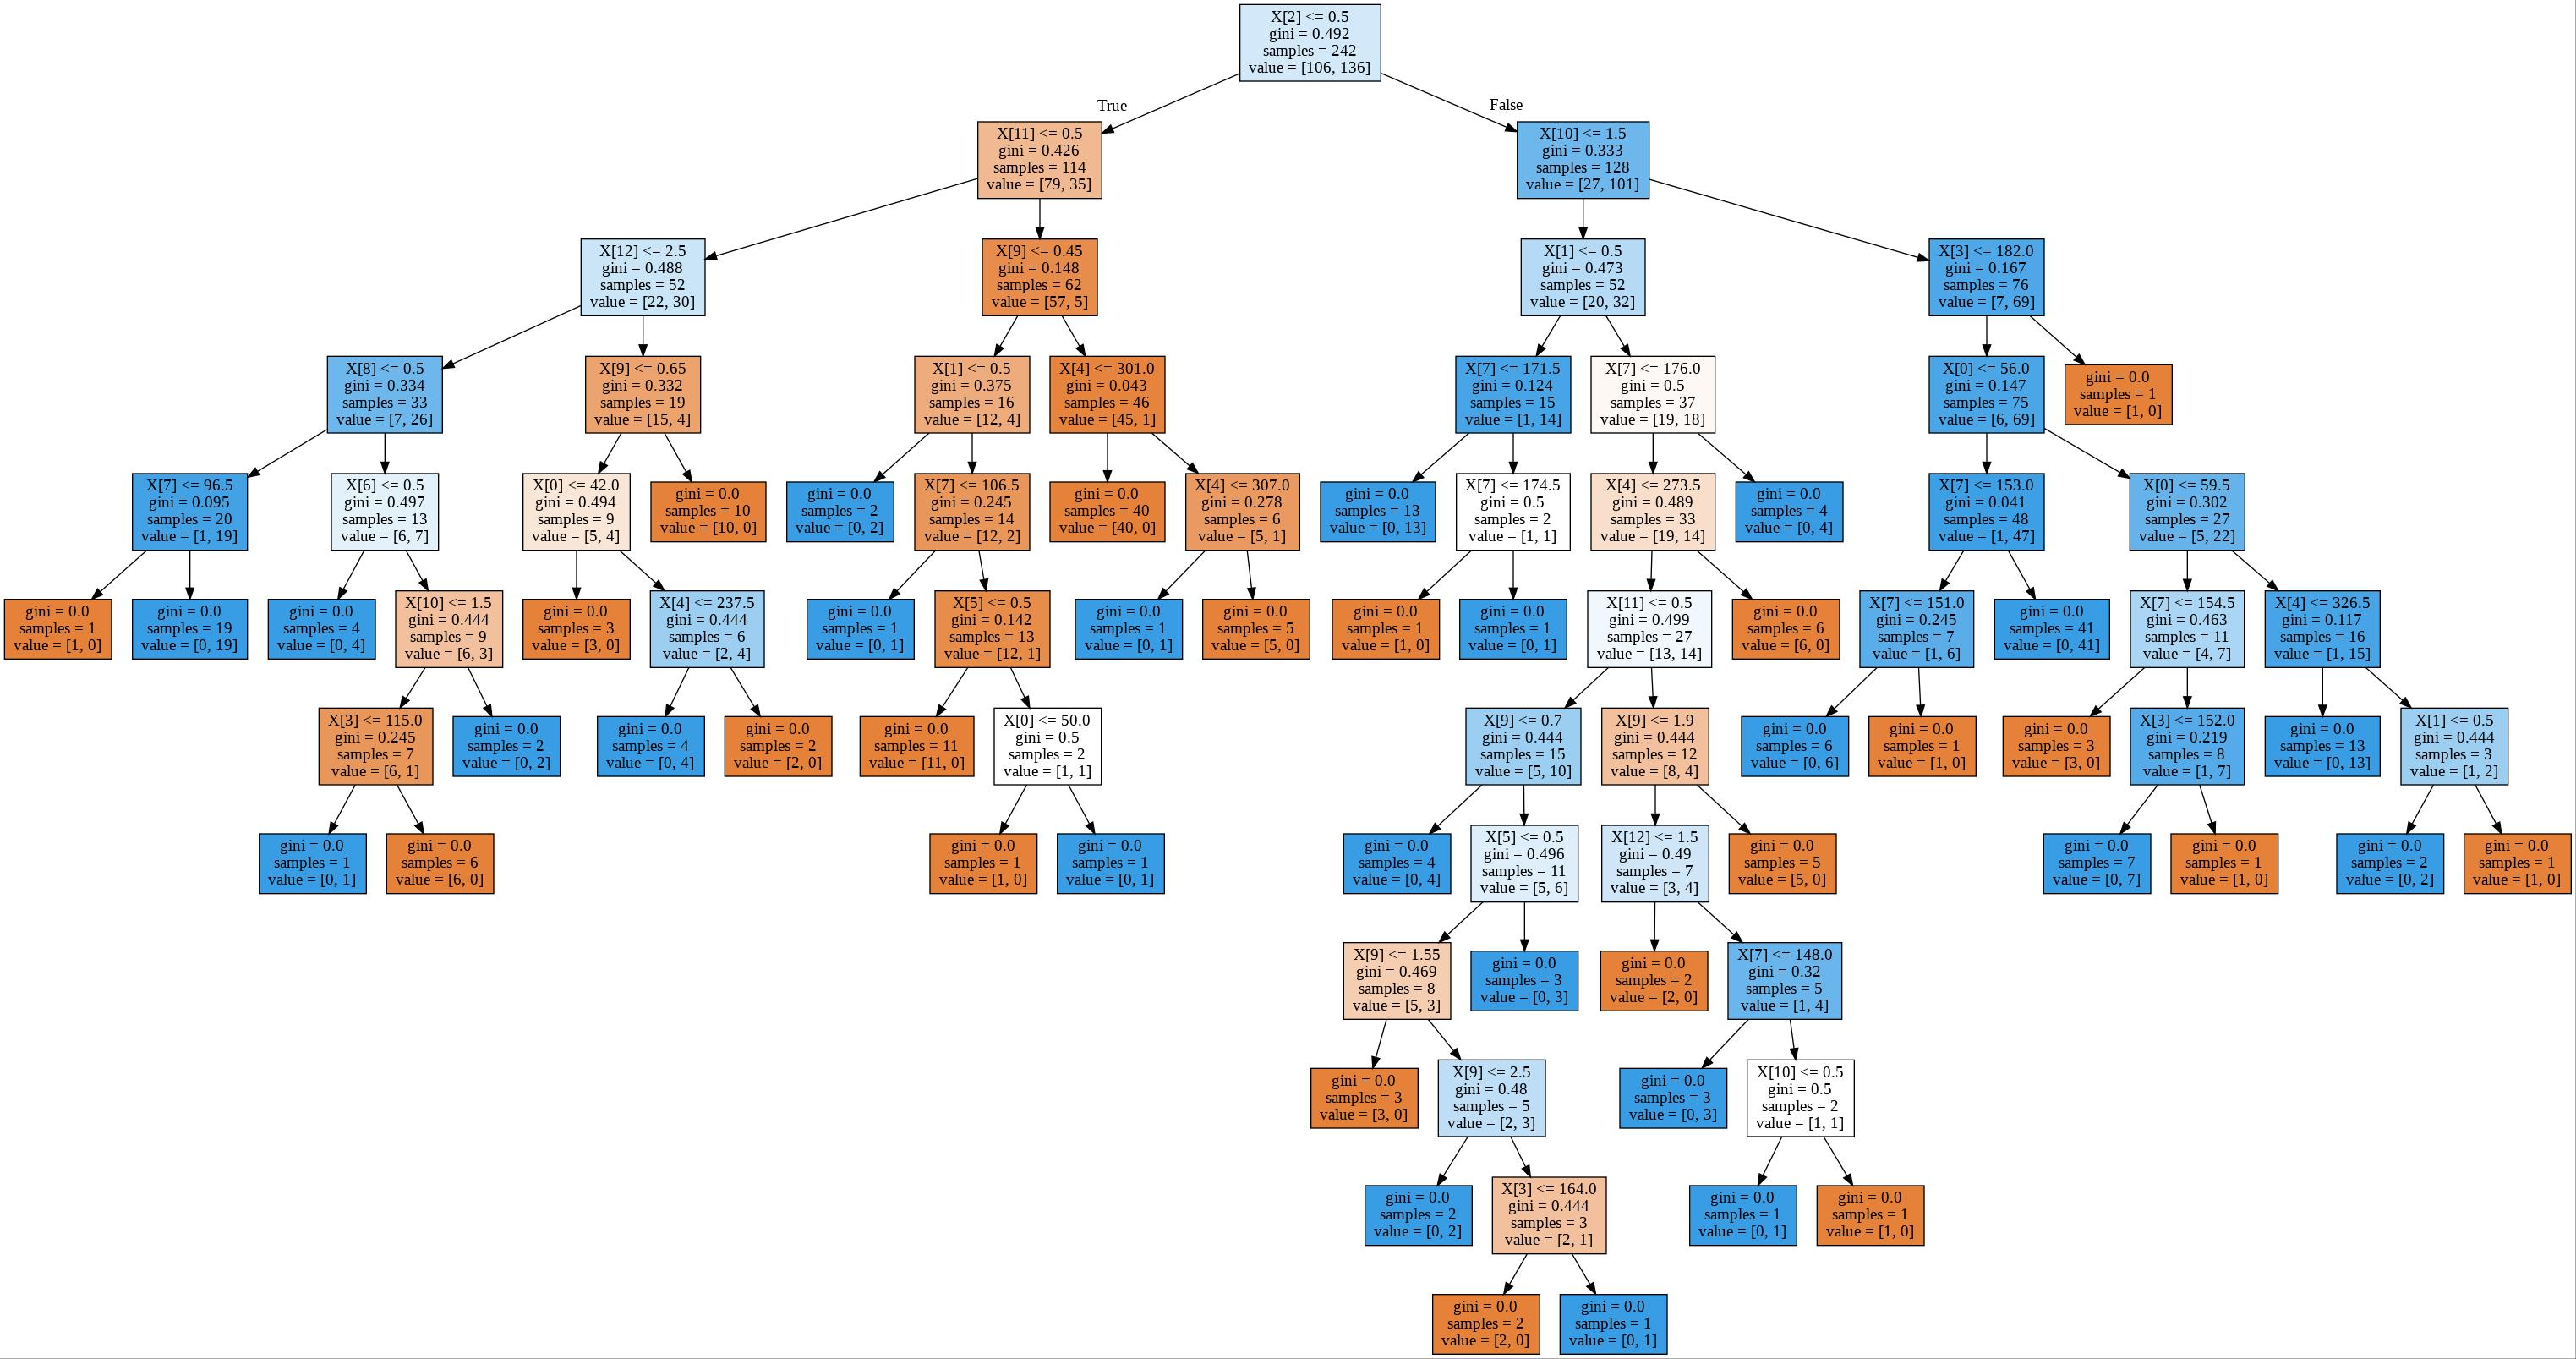

In [29]:
graph.write_jpg("Mydt.jpg")
Image(graph.create_jpg())

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[25,  7],
       [ 3, 26]])

In [32]:
from sklearn import metrics

In [33]:
acc=metrics.accuracy_score(y_test,y_pred)

In [34]:
acc

0.8360655737704918

In [35]:
# ENTROPY

In [36]:
dt=tree.DecisionTreeClassifier(criterion='entropy')

In [37]:
dt_fit=dt.fit(x_train,y_train)

In [38]:
dt.score(x_test,y_test)

0.8032786885245902

In [39]:
y_pred=dt.predict(x_test)

In [40]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

[Text(182.34642857142856, 195.696, 'X[2] <= 0.5\nentropy = 0.989\nsamples = 242\nvalue = [106, 136]'),
 Text(95.65714285714286, 152.208, 'X[11] <= 0.5\nentropy = 0.89\nsamples = 114\nvalue = [79, 35]'),
 Text(47.82857142857143, 108.72, 'X[12] <= 2.5\nentropy = 0.983\nsamples = 52\nvalue = [22, 30]'),
 Text(23.914285714285715, 65.232, 'X[10] <= 1.5\nentropy = 0.746\nsamples = 33\nvalue = [7, 26]'),
 Text(11.957142857142857, 21.744, '\n  (...)  \n'),
 Text(35.871428571428574, 21.744, '\n  (...)  \n'),
 Text(71.74285714285715, 65.232, 'X[9] <= 0.65\nentropy = 0.742\nsamples = 19\nvalue = [15, 4]'),
 Text(59.785714285714285, 21.744, '\n  (...)  \n'),
 Text(83.7, 21.744, '\n  (...)  \n'),
 Text(143.4857142857143, 108.72, 'X[9] <= 0.45\nentropy = 0.404\nsamples = 62\nvalue = [57, 5]'),
 Text(119.57142857142857, 65.232, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(107.61428571428571, 21.744, '\n  (...)  \n'),
 Text(131.52857142857144, 21.744, '\n  (...)  \n'),
 Text(1

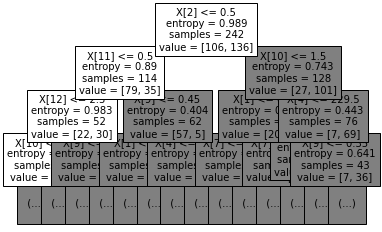

In [41]:
tree.plot_tree(dt,max_depth=3,fontsize=10)

In [42]:
data=StringIO()
export_graphviz(dt_fit,out_file=data,filled=True)

In [43]:
graph=pydotplus.graph_from_dot_data(data.getvalue())

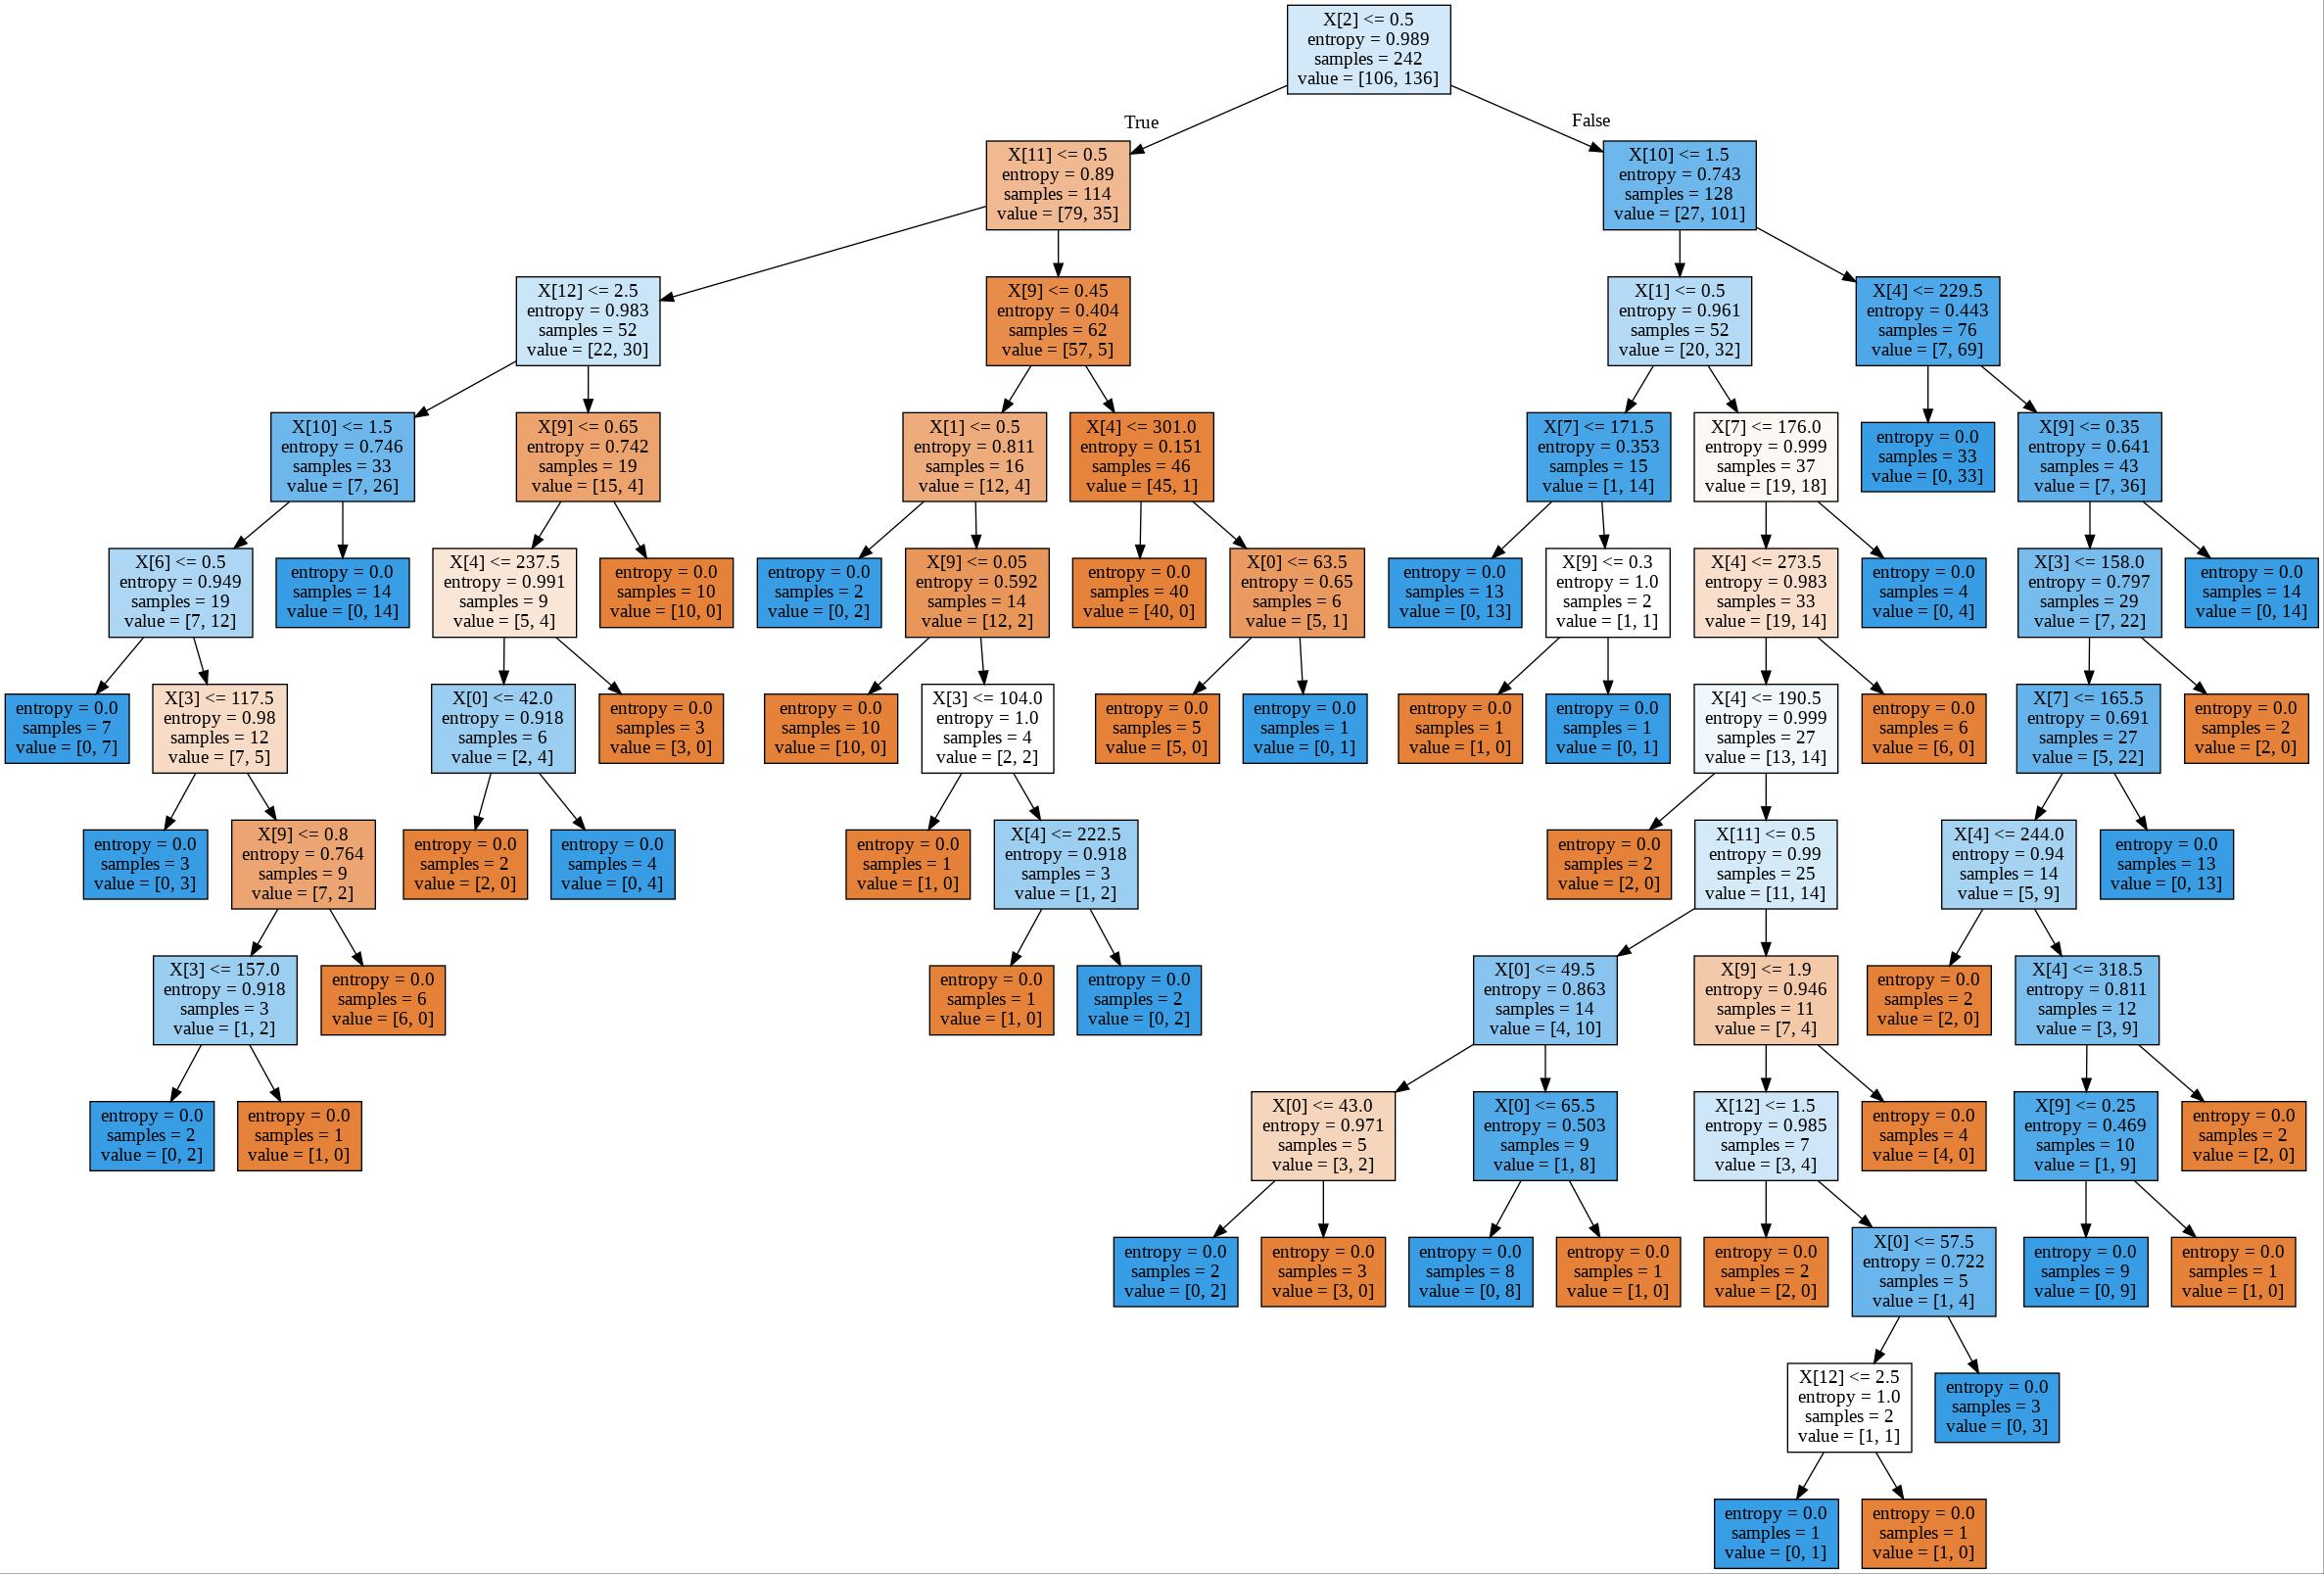

In [44]:
graph.write_jpg('ENT.jpg')
Image(graph.create_jpg())

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,y_pred)

array([[22, 10],
       [ 2, 27]])

In [47]:
from sklearn import metrics

In [48]:
acc=metrics.accuracy_score(y_test,y_pred)

In [49]:
acc

0.8032786885245902

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
para={'max_depth':(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),'max_features':('auto','sqrt','log2'),'min_samples_split':(2,4,6)}

HYPER PARAMETER TESTING

In [52]:
dt_grid=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=para,cv=5)

In [53]:
dt_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [54]:
dt_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=70, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

BEST ESTIMATOR IS USED TO FIND OUT THE BEST CRITERION AND PARAMETER TO BE USED FOR MODEL

In [55]:
dt_1=tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=70, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
dt_1_fit=dt_1.fit(x_train,y_train)

In [57]:
dt_1.score(x_test,y_test)

0.8360655737704918

In [58]:
y_pred=dt.predict(x_test)

In [59]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

[Text(167.4, 190.26, 'X[12] <= 2.5\ngini = 0.492\nsamples = 242\nvalue = [106, 136]'),
 Text(83.7, 135.9, 'X[2] <= 0.5\ngini = 0.388\nsamples = 152\nvalue = [40, 112]'),
 Text(41.85, 81.53999999999999, 'X[8] <= 0.5\ngini = 0.499\nsamples = 55\nvalue = [26, 29]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 1.7\ngini = 0.247\nsamples = 97\nvalue = [14, 83]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.391\nsamples = 90\nvalue = [66, 24]'),
 Text(209.25, 81.53999999999999, 'X[9] <= 0.65\ngini = 0.183\nsamples = 59\nvalue = [53, 6]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[4] <= 228.0\ngini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Te

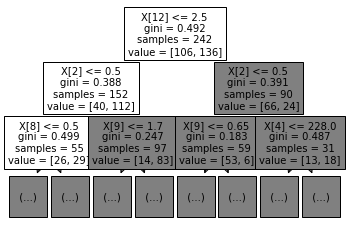

In [64]:
tree.plot_tree(dt_1,max_depth=2,fontsize=10)

In [65]:
data =StringIO()
export_graphviz(dt_1_fit,out_file=data,filled=True)

In [66]:
graph=pydotplus.graph_from_dot_data(data.getvalue())

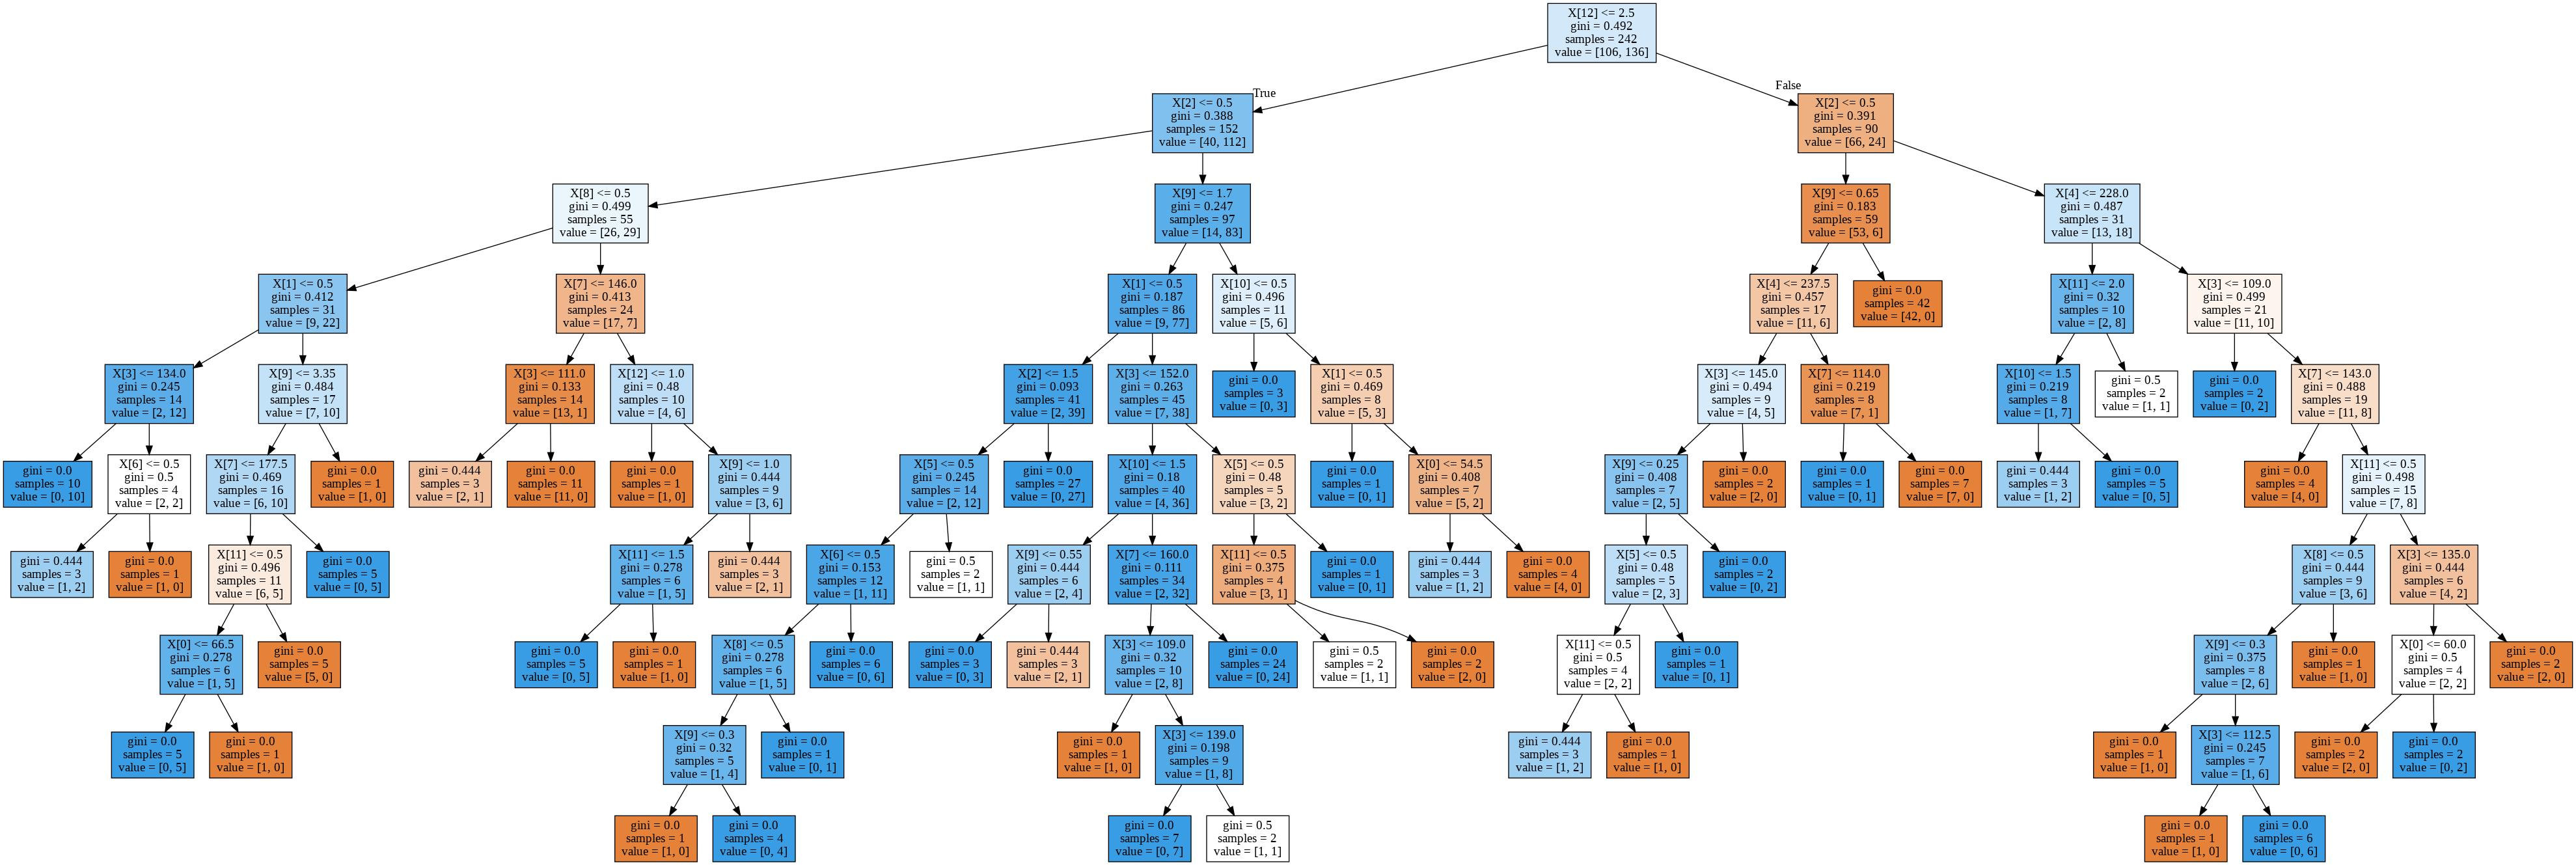

In [67]:
graph.write_jpg("bestdt.jpg")
Image(graph.create_jpg())